In [1]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import ClusterCentroids
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
X_train = joblib.load('tmp/X_so2_train.pkl')[:333333]
X_test = joblib.load('tmp/X_so2_test.pkl')[:166000]

y_train = joblib.load('tmp/y_so2_train.pkl')[:333333]
y_test = joblib.load('tmp/y_so2_test.pkl')[:166000]


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
              

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)

In [20]:
clf.fit(X_train_new, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform')

In [21]:
scores = clf.score(X_test_new, y_test)

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.00)


Confusion matrix, without normalization
[[16282   914 18759]
 [ 5304  4995 13335]
 [ 9780   702 54929]]
Normalized confusion matrix
[[0.45 0.03 0.52]
 [0.22 0.21 0.56]
 [0.15 0.01 0.84]]


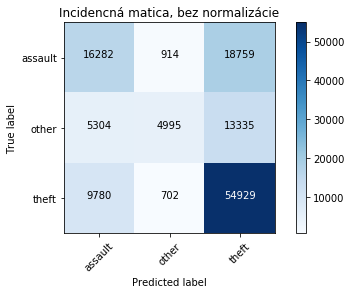

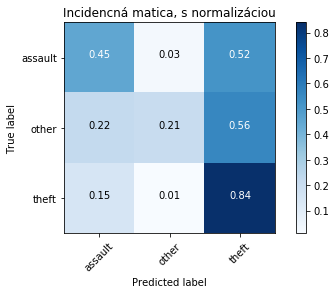

In [23]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
y_pred = clf.predict(X_test_new)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test),
                      title='Incidencná matica, bez normalizácie')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test), normalize=True,
                      title='Incidencná matica, s normalizáciou')

plt.show()